In [156]:
#Analyzing NGSS PEs
#Ridgway
#March 28, 2020

In [157]:
#Import pandas module
import pandas as pd

#Import matplotlib
import matplotlib.pyplot as plt

#Ask user which file they want to access
filename = 'ngss.csv'

#Create variable using pandas to read the file
df = pd.read_csv(filename)

# Create a new data frame with split value columns 
new = df["PE_Number"].str.split("-", n=1, expand=True)

# Making a separate grade column from new data frame 
df["Grade"]= new[0] 
  
# Making a separate PE column from new data frame 
df["PE"]= new[1] 
  
# Drop the old PE_Number columns 
df.drop(columns =["PE_Number"], inplace = True) 

# Add a column for grade bands
grade_bands = []
for grade in df.Grade:
    if grade == "K" or grade == "1" or grade == "2" or grade == "3" or grade == "4" or grade == "5":
        grade_bands.append("K-5")
    else:
        grade_bands.append(grade)

df["Grade_Bands"] = grade_bands

#Drop the Grade column as the grade bands is only needed
df.drop(columns =["Grade"], inplace = True) 

In [158]:
#Set index to Grade_bands to utilize .loc
df = df.set_index("Grade_Bands")

# Determine and plot the frequency of each cross-cutting concept
ccc_freq = df['CCC'].value_counts(normalize=True) *100

#Determine CCC breakdown in HS
hs = df.loc["HS"]
hs_freq = hs['CCC'].value_counts(normalize=True) *100

#Determine CCC breakdown in MS
ms = df.loc["MS"]
ms_freq = ms['CCC'].value_counts(normalize=True) *100

#Determine CCC breakdown in MS
k5 = df.loc["K-5"]
k5_freq = k5['CCC'].value_counts(normalize=True) *100

#Combine series into one dataframe
all_ccc = pd.concat([k5_freq, ms_freq, hs_freq, ccc_freq], axis=1)
all_ccc.columns = ["K-5_CCC", "MS_CCC", "HS_CCC", "All_CCC"]

#Only view secondary CCC
sec_ccc = all_ccc[["MS_CCC", "HS_CCC"]].sort_values("MS_CCC", ascending = False)
sec_ccc


,MS_CCC,HS_CCC
Cause and Effect,25.423729,22.535211
Patterns,15.254237,11.267606
Energy and Matter,13.559322,19.718310
"Scale, Proportion, and Quantity",11.864407,7.042254
Systems and System Models,10.169492,12.676056
Stability and Change,8.474576,16.901408
Structure and Function,8.474576,4.225352
None,6.779661,5.633803


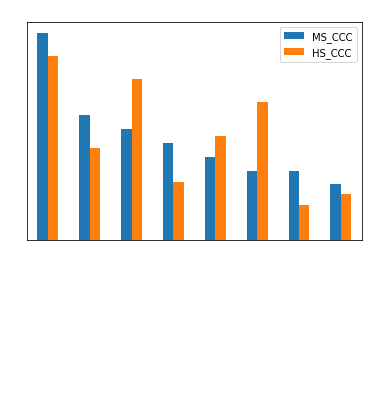

In [159]:
#Plot secondary ccc
sec_ccc_plot = sec_ccc.plot(kind="bar")

plt.xticks(color = "white")
plt.tick_params(axis = "x", colors = "white")
plt.tick_params(axis = "y", colors = "white")
plt.yticks(color = "white")
plt.title("Representation of CCCs in PEs", color = "white")

plt.show()

In [160]:
# Determine and plot the frequency of each science and engineering practice
sep_freq = df['SEP'].value_counts(normalize=True) *100

#Determine SEP breakdown in HS
hs_SEP_freq = hs['SEP'].value_counts(normalize=True) *100

#Determine SEP breakdown in MS
ms_SEP_freq = ms['SEP'].value_counts(normalize=True) *100

#Determine SEP breakdown in MS
k5 = df.loc["K-5"]
k5_SEP_freq = k5['SEP'].value_counts(normalize=True) *100

#Combine series into one dataframe
all_sep = pd.concat([k5_SEP_freq, ms_SEP_freq, hs_SEP_freq, sep_freq], axis=1)
all_sep.columns = ["K-5_SEP", "MS_SEP", "HS_SEP", "All_SEP"]

#Only view secondary SEP
sec_sep = all_sep[["MS_SEP", "HS_SEP"]].sort_values("MS_SEP", ascending = False)
sec_sep

,MS_SEP,HS_SEP
Developing and Using Models,27.118644,21.126761
Constructing Explanations and Designing Solutions,20.338983,23.943662
Analyzing and Interpreting Data,15.254237,7.042254
Engaging in Argument from Evidence,13.559322,11.267606
Planning and Carrying Out Investigations,8.474576,7.042254
"Obtaining, Evaluating, and Communicating Information",6.779661,7.042254
Asking Questions and Defining Problems,5.084746,4.225352
Using Mathematics and Computational Thinking,3.389831,18.309859


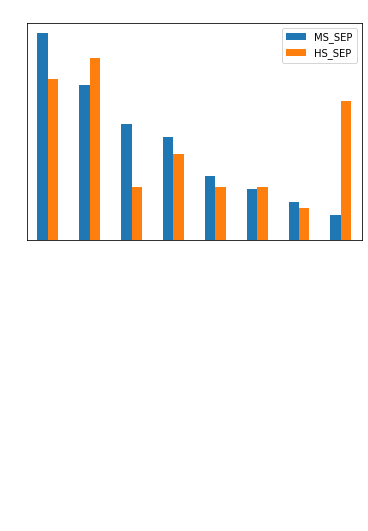

In [161]:
# Plot the frequency of secondary science and engineering practice
sec_sep_plot = sec_sep.plot(kind="bar")

plt.xticks(color = "white")
plt.tick_params(axis = "x", colors = "white")
plt.tick_params(axis = "y", colors = "white")
plt.yticks(color = "white")
plt.title("Representation of SEPs in PEs", color = "white")

plt.show()

In [162]:
#Count the number of times a CCC is connected a SEP
ms_group = ms.groupby(["CCC","SEP"]).count()

#Sort the values in descending order
ms_group_srt = ms_group.sort_values(["PE","SEP"], ascending = False)

#Display the CCCs and SEPs that are related more than twice
display(ms_group_srt.head(6))

,,PE
CCC,SEP,
Patterns,Analyzing and Interpreting Data,5
Energy and Matter,Developing and Using Models,4
Cause and Effect,Constructing Explanations and Designing Solutions,4
Structure and Function,Developing and Using Models,3
Systems and System Models,Developing and Using Models,3
Energy and Matter,Constructing Explanations and Designing Solutions,3


In [163]:
#Count the number of times a CCC is connected a SEP
hs_group = hs.groupby(["CCC","SEP"]).count()

#Sort the values in descending order
hs_group_srt = hs_group.sort_values(["PE","SEP"], ascending = False)

#Display the CCCs and SEPs that are related more than twice
display(hs_group_srt.head(8))

,,PE
CCC,SEP,
Energy and Matter,Developing and Using Models,7
Systems and System Models,Using Mathematics and Computational Thinking,4
Cause and Effect,Constructing Explanations and Designing Solutions,4
Energy and Matter,Constructing Explanations and Designing Solutions,4
Stability and Change,Constructing Explanations and Designing Solutions,4
"Scale, Proportion, and Quantity",Using Mathematics and Computational Thinking,3
Cause and Effect,Engaging in Argument from Evidence,3
Systems and System Models,Developing and Using Models,3
